## Use Case 3 — Churn / Repeat Purchase Prediction 


<>:13: SyntaxWarning: invalid escape sequence '\S'
<>:13: SyntaxWarning: invalid escape sequence '\S'
C:\Users\priya\AppData\Local\Temp\ipykernel_25520\3419645485.py:13: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_excel("C:\Semester 3\Text, Web & Sen Analytics\Capston_Project-Priya_Saini(24MBMB34)\ecom_analytics_data.xlsx")


Class distribution (0 = Retained, 1 = Churned):
churn
1    82
0    18
Name: count, dtype: int64 

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.80      1.00      0.89        16

    accuracy                           0.80        20
   macro avg       0.40      0.50      0.44        20
weighted avg       0.64      0.80      0.71        20

ROC AUC: 0.796875


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


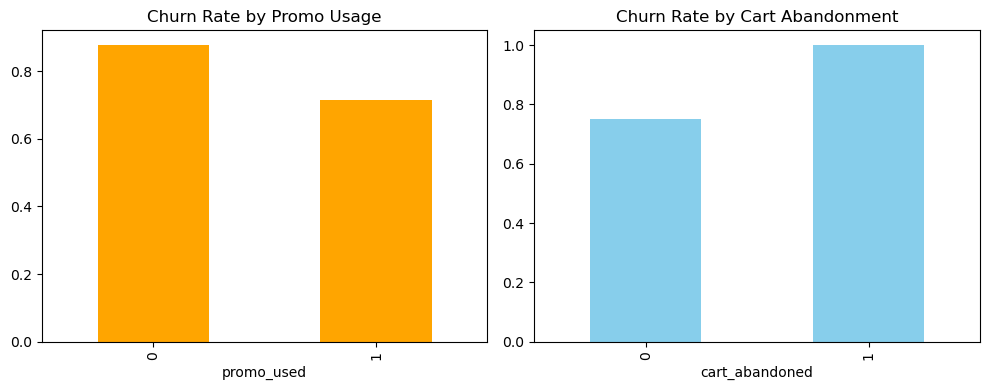

In [3]:
# ✅ USE CASE 3 — CHURN / REPEAT PURCHASE PREDICTION
# Objective: Predict which customers are likely to churn based on behavioral, web, and sentiment factors

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

# ----------------------------
# 1️⃣ Load dataset
# ----------------------------
df = pd.read_excel("C:\Semester 3\Text, Web & Sen Analytics\Capston_Project-Priya_Saini(24MBMB34)\ecom_analytics_data.xlsx")

# ----------------------------
# 2️⃣ Define churn variable
# ----------------------------
# A user is considered churned if:
# - They have 1 or 2 orders only, OR
# - Their average rating < 3, OR
# - They abandoned cart in their last session

user_features = df.groupby('user_id').agg({
    'order_id':'count',
    'review_rating':'mean',
    'cart_abandoned':'max'
}).rename(columns={'order_id':'order_count','review_rating':'avg_rating'})

user_features['churn'] = (
    (user_features['order_count'] <= 2) |
    (user_features['avg_rating'] < 3) |
    (user_features['cart_abandoned'] == 1)
).astype(int)

# Merge churn back to main dataframe
df = df.merge(user_features['churn'], on='user_id', suffixes=('','_user'))

# Check class distribution
print("Class distribution (0 = Retained, 1 = Churned):")
print(df['churn'].value_counts(), "\n")

# ----------------------------
# 3️⃣ Feature selection
# ----------------------------
features = ['session_duration_sec','pages_visited','cart_abandoned','promo_used']
X = df[features].fillna(0)
y = df['churn']

# ----------------------------
# 4️⃣ Split data
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42, test_size=0.2
)

# ----------------------------
# 5️⃣ Train model
# ----------------------------
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
pred = model.predict(X_test)

# ----------------------------
# 6️⃣ Evaluate model
# ----------------------------
print("Classification Report:")
print(classification_report(y_test, pred))
print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

# ----------------------------
# 7️⃣ Visualization: churn rate by key features
# ----------------------------
fig, axes = plt.subplots(1, 2, figsize=(10,4))
df.groupby('promo_used')['churn'].mean().plot(kind='bar', ax=axes[0], color='orange', title='Churn Rate by Promo Usage')
df.groupby('cart_abandoned')['churn'].mean().plot(kind='bar', ax=axes[1], color='skyblue', title='Churn Rate by Cart Abandonment')
plt.tight_layout()
plt.show()

